# CS 5012 Mini Project: SQLite DB Creation
## Jordan Hiatt (jdh2e), Jing Huang(jh4yd), Diana McSpadden (hdm5s)

For this mini project we used a dataset from the COnsumer Financial Protection Bureau. <https://www.consumerfinance.gov/data-research/student-banking/marketing-agreements-and-data/>

The csv we used containes annual information from credit card issuers who have credit card marketing agreements with universities, colleges and affiliated organizations. 

The csv (clean_CC_Institution.csv) is included with out project submission and contains the following columns:
1. YEAR
1. INSTITUTION
1. TYPE
1. CITY
1. STATE
1. CC_ISSUER
1. TOTAL_ACCOUNTS
1. TOTAL_NEW_ACCOUNTS

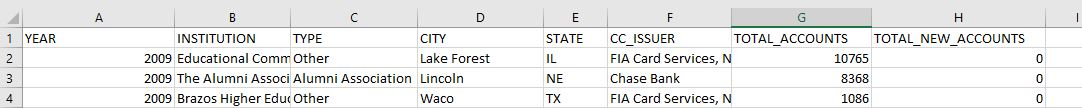

# ER Diagram

From the csv we modeled an ER diagram with 4 entities and 3 relationships:

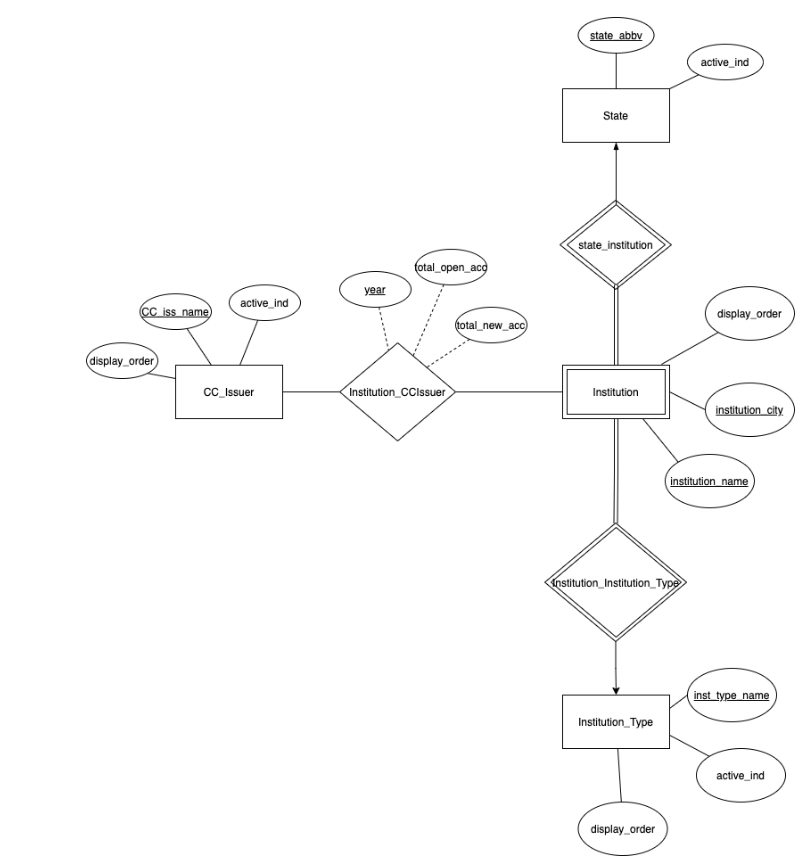

## Description of ER Diagram:

**State Entity**: The State entity functions as a reference entity to ensure that Institution’s compound primary key has valid state_abbv values.

**CC_Issuer Entity**: The CC_Issuer entity functions as a reference table of available credit card issuers. We added a display order and active indicator to the table to allow sorting not based on name, and also allow for credit card issuers to be marked as inactive, and not need to be deleted from the data set.

**Institution_Type Entity**: The Institution_Type entity functions as a reference table of possible institution types. We added a display order and active indicator to the table to allow sorting not based on name, and also allow for institution type to be marked as inactive, and not need to be deleted from the data set.

**Institution Entity**: The Institution Entity has a compound primary key of the city where the institution is, and the Institution name. The state_abbv value from the State entity and the inst_type_name are required to create a unique primary key for each institution, thus these are weak entity relationships to the weak Institution entity. 

Institution needs a complex primary key, using keys from Institution Type and State institution (creating a double weak entity relationship with those tables).  This is because the data was not validated when added to the original data source.  This means that we have institutions with similar names but different institution types, or the same institution in multiple cities within the same state.  We also were mindful of Institutions that could have been in different states with the same city name.  Because we have so many duplicate values with slightly different names or parameters, we were overly cautions with our institution primary key leading to a multipart key across three tables.

**Institution_CCIssuer Relationship**: this relationship is where total open account numbers and total new account numbers are saved for unique Institutions by year.


## DB Schema
And we translated the ER Diagram to a DB schema with 5 tables:

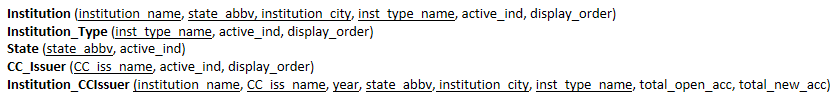

## Creating CSVs for Upload
From the single clean csv, we created 5 separate csvs that are used to insert records into the database. The csvs are available in github:

<br />State: https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_CC_State.csv
<br />

Institution Type: https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_CC_Institution_Type.csv
<br />

Institution: https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_Institution.csv
<br />

Issuer: https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_CC_Issuer.csv
<br />

Institution CCIssuer: https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_CC_Institution.csv

## Creating the SQLite Database
We created SQLite database using the schema as a guide:

In [1]:
# Python Code to create the database and tables
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
from sqlite3 import Error

# create / connect to database of "CreditCard"
db_file = "CreditCard"

conn = None
try:
  conn = sqlite3.connect(db_file)
  print(sqlite3.version)
  c = conn.cursor()
except Error as e:
  print(e)




2.6.0


Creating tables

In [2]:
# create tables
# create table state
c.execute(''' 
  DROP TABLE IF EXISTS State;
''')
c.execute('''
  CREATE TABLE IF NOT EXISTS State(
  state_abbv TEXT NOT NULL,
  active_ind TEXT DEFAULT 'Y',
  PRIMARY KEY (state_abbv)
  );''')


In [3]:
# create table CC_Issuer
c.execute(''' 
  DROP TABLE IF EXISTS CC_Issuer;
''')
c.execute(''' 
  CREATE TABLE IF NOT EXISTS CC_Issuer(
  CC_iss_name TEXT NOT NULL,
  active_ind TEXT DEFAULT 'Y',
  display_order INT DEFAULT 1,
  PRIMARY KEY (CC_iss_name)
  );''')



In [4]:
# create table Institution_type
c.execute(''' 
  DROP TABLE IF EXISTS Institution_type;
''')
c.execute('''CREATE TABLE IF NOT EXISTS Institution_type(
  inst_type_name TEXT NOT NULL,
  active_ind TEXT DEFAULT 'Y',
  display_order INT DEFAULT 1,
  PRIMARY KEY (inst_type_name)
  );''')

# create table Institution
c.execute(''' 
  DROP TABLE IF EXISTS Institution;
''')
c.execute('''CREATE TABLE IF NOT EXISTS Institution(
  institution_name TEXT NOT NULL,
  inst_type_name TEXT NOT NULL,
  state_abbv TEXT NOT NULL,
  institution_city TEXT NOT NULL,
  active_ind TEXT DEFAULT 'Y',
  display_order INT DEFAULT 1,
  PRIMARY KEY (institution_name, inst_type_name, state_abbv, institution_city),
  FOREIGN KEY (state_abbv) REFERENCES State,
  FOREIGN KEY (inst_type_name) REFERENCES Institution_type
  );''')

# create table Institution_CCIssuer
c.execute(''' 
  DROP TABLE IF EXISTS Institution_CCIssuer;
''')
c.execute('''CREATE TABLE IF NOT EXISTS Institution_CCIssuer(
  year NUMERIC NOT NULL,
  institution_name TEXT NOT NULL,
  inst_type_name TEXT NOT NULL,
  institution_city TEXT NOT NULL,
  state_abbv TEXT NOT NULL,
  CC_iss_name TEXT NOT NULL,
  total_open_acc INTEGER DEFAULT 0,
  total_new_acc INTEGER DEFAULT 0,
  PRIMARY KEY (institution_name, CC_iss_name, state_abbv, institution_city, inst_type_name, year),
  FOREIGN KEY (institution_name) REFERENCES Institution,
  FOREIGN KEY (state_abbv) REFERENCES State,
  FOREIGN KEY (CC_iss_name) REFERENCES CC_Issuer
  );''')

Commit the new tables, then select from each one to confirm empty tables.

In [5]:
conn.commit()

# State Table
c.execute('''
SELECT state_abbv, active_ind
FROM State 
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['state_abbv','active_ind'])


,state_abbv,active_ind


In [6]:
# Institution Table
c.execute('''SELECT institution_name, inst_type_name, state_abbv, institution_city, active_ind, display_order
FROM Institution 
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['institution_name','inst_type_name','state_abbv','institution_city','active_ind','display_order'])

,institution_name,inst_type_name,state_abbv,institution_city,active_ind,display_order


In [7]:
# Institution Type Table
c.execute('''SELECT inst_type_name, active_ind, display_order
FROM Institution_type 
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['inst_type_name','active_ind','display_order'])

,inst_type_name,active_ind,display_order


In [8]:
# CC_Issuer Table
c.execute('''SELECT CC_iss_name, active_ind, display_order
FROM CC_Issuer 
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['CC_iss_name','active_ind', 'display_order'])

,CC_iss_name,active_ind,display_order


In [9]:
# Institution_CCIssuer Table
c.execute('''SELECT institution_name, CC_iss_name, year, state_abbv, institution_city, inst_type_name, total_open_acc, total_new_acc
FROM Institution_CCIssuer 
''')
query = c.fetchall()

pd.DataFrame(query,columns=['institution_name','CC_iss_name','year', 'state_abbv', 'institution_city', 'inst_type_name','total_open_acc','total_new_acc'])

,institution_name,CC_iss_name,year,state_abbv,institution_city,inst_type_name,total_open_acc,total_new_acc


## Inserting Data
Next, inserted data into our database from the csv.

The following uses the Sqlite PRAGMA function to retrieve data about the sqlite database. 

Reference: https://sqlite.org/pragma.html#pragma_table_info

In [10]:
# Reference https://www.excelcise.org/python-sqlite-insert-data-pandas-data-frame/

def insert_values_to_table(table_name, file_url):
    """
    With pandas library:
    1) Open the csv file in variable file_url csv 
    2) Store content in a pandas data frame
    3) if the column name exists insert the data to the table (table_name)
    :param table_name: table name in the database to insert the data into
    :param file_url: url of the excel file to process
    :return: None
    """
   
    if conn is not None:
        c = conn.cursor()
        df = pd.read_csv(file_url)
        df.columns = get_column_names_from_db_table(c, table_name)
        df.to_sql(name=table_name, con=conn, if_exists='append', index=False) # since our table is new we could run this with any of the if_exists behaviors
        print('SQL insert process finished')
    else:
        print('Connection to database failed')

def get_column_names_from_db_table(sql_cursor, table_name):
    """
    Get the columns names from the database table
    Put column names in a list
    :param sql_cursor: sqlite cursor
    :param table_name: table name to get the column names from
    :return: a list with table column names
    """

    # Use PRAGMA sqlite function to get the table info == the column names
    table_column_names = 'PRAGMA table_info(' + table_name + ');'
    sql_cursor.execute(table_column_names)
    table_column_names = sql_cursor.fetchall()

    column_names = list()

    for name in table_column_names:
        column_names.append(name[1])

    return column_names

In [11]:
# Add to State Table
# load the csv as a pandas dataframe
url = 'https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_CC_State.csv'

insert_values_to_table("State", url)

SQL insert process finished


In [12]:
# State Table
c.execute('''
SELECT state_abbv, active_ind
FROM State 
ORDER BY state_abbv
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['state_abbv','active_ind'])

,state_abbv,active_ind
0,AK,Y
1,AL,Y
2,AR,Y
3,AZ,Y
4,CA,Y
5,CO,Y
6,CO,Y
7,CT,Y
8,DC,Y
9,DE,Y


In [13]:
# Add to Institution_type
# load the csv as a pandas dataframe
url = 'https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_CC_Institution_Type.csv'

insert_values_to_table("Institution_type", url)

SQL insert process finished


In [14]:
# Institution_type Table
c.execute('''
SELECT inst_type_name, active_ind, display_order
FROM Institution_type 
ORDER BY display_order
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['inst_type_name','active_ind','display_order'])

,inst_type_name,active_ind,display_order
0,Alumni Association,Y,1
1,"Alumni Association, Foundation",Y,2
2,"Alumni Association, Foundation, Other",Y,3
3,"Alumni Association, Other",Y,4
4,"Alumni Association, University",Y,5
5,Foundation,Y,6
6,University,Y,7
7,"University, Other",Y,8
8,Other,Y,9


In [15]:
# Add to CC_Issuer table
# load the csv as a pandas dataframe
url = 'https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_CC_Issuer.csv'

insert_values_to_table("CC_Issuer", url)

SQL insert process finished


In [16]:
# CC_Issuer Table
c.execute('''
SELECT CC_iss_name, active_ind, display_order
FROM CC_Issuer 
ORDER BY display_order
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['CC_iss_name','active_ind','display_order'])

,CC_iss_name,active_ind,display_order
0,Andigo Credit Union,Y,1
1,Apple Federal Credit Union,Y,2
2,Banco Popular de Puerto Rico,Y,3
3,Banco Santander Puerto Rico,Y,4
4,Bank of America,Y,5
5,Barclays Bank Delaware,Y,6
6,Boeing Employees' Credit Union,Y,7
7,Capital One,Y,8
8,Carolina Trust Federal Credit Union,Y,9
9,Central Bank & Trust Co.,Y,10


In [17]:
# Add to Institution table
# load the csv as a pandas dataframe
url = 'https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_Institution.csv'

insert_values_to_table("Institution", url)

SQL insert process finished


In [18]:
# CC_Issuer Table
c.execute('''
SELECT institution_name, inst_type_name, active_ind, display_order, state_abbv, institution_city
FROM Institution 
ORDER BY institution_name
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['institution_name','inst_type_name','active_ind','display_order', 'state_abbv', 'institution_city'])

,institution_name,inst_type_name,active_ind,display_order,state_abbv,institution_city
0,\tGeorgia State University Alumni Association\t,Alumni Association,Y,1,Atlanta,GA
1,AACS,Alumni Association,Y,2,Chattanooga,TN
2,ASM International,Other,Y,132,Materials Park,OH
3,Abilene Christian University,University,Y,3,Abilene,TX
4,Academy of Art College,University,Y,4,San Francisco,CA
...,...,...,...,...,...,...
1815,Youngstown State University,Alumni Association,Y,1901,Youngstown,OH
1816,Youngstown State University,University,Y,1900,Youngstown,OH
1817,Zeta Beta Tau Fraternity Inc,Other,Y,1902,Indianapolis,IN
1818,"Zeta Beta Tau Fraternity, Inc.",Other,Y,1903,Indianapolis,IN


In [19]:
# Add to Institution_CCIssuer table
# load the csv as a pandas dataframe
url = 'https://raw.githubusercontent.com/hdmcspadden/DataSources/main/clean_CC_Institution.csv'

insert_values_to_table("Institution_CCIssuer", url)

SQL insert process finished


In [20]:
# Institution_CCIssuer Table
c.execute('''
SELECT institution_name, CC_iss_name, year, state_abbv, institution_city, inst_type_name, total_open_acc, total_new_acc
FROM Institution_CCIssuer 
ORDER BY year
''')
query = c.fetchall()
#query
pd.DataFrame(query,columns=['institution_name','CC_iss_name','year','state_abbv', 'institution_city', 'inst_type_name','total_open_acc','total_new_acc'])

,institution_name,CC_iss_name,year,state_abbv,institution_city,inst_type_name,total_open_acc,total_new_acc
0,Abilene Christian University,"FIA Card Services, N.A.",2009,TX,Abilene,University,1699,13
1,Academy of Art College,"FIA Card Services, N.A.",2009,CA,San Francisco,University,132,0
2,Administrators of the Tulane Educational Fund,"FIA Card Services, N.A.",2009,LA,New Orleans,Foundation,1495,31
3,Adrian College,"FIA Card Services, N.A.",2009,MI,Adrian,University,110,0
4,Alabama Pharmacy Association,"FIA Card Services, N.A.",2009,AL,Montgomery,Other,124,0
...,...,...,...,...,...,...,...,...
5511,William & Mary University,Commerce Bank,2019,VA,Williamsburg,Alumni Association,5,5
5512,William Jewell College,UMB Bank,2019,MO,Liberty,University,71,0
5513,Wisconsin Alumni Association (UW-Madison),University of Wisconsin (UW) Credit Union,2019,WI,Madison,Alumni Association,970,277
5514,Wright State University Alumni Association,Wright-Patt Credit Union,2019,OH,Fairborn,Alumni Association,698,65


## Answering Questions About Our Data
We have several questions about our data, for many we created plots and/or visualizations.

### <b>Queston 1</b>: Do credit card issuers deal with a wider variety of types of institutions over time? If we look across multiple years, do the variety of institution types grow, shrink, or change over time?

In [21]:
# TO DO: SQL QUERY FOR QUESTION 1

c.execute('''SELECT year, inst_type_name As 'institution type',  count(institution_name) AS counts
From Institution_CCIssuer
GROUP BY year, inst_type_name''')

query = c.fetchall()

pd.set_option('display.max_rows', None)
q1df = pd.DataFrame(query,columns=['year','instition type', 'counts'])
q1df

,year,instition type,counts
0,2009,Alumni Association,350
1,2009,"Alumni Association, Foundation",7
2,2009,"Alumni Association, Other",1
3,2009,"Alumni Association, University",10
4,2009,Foundation,84
5,2009,Other,180
6,2009,University,413
7,2010,Alumni Association,363
8,2010,"Alumni Association, Foundation",7
9,2010,"Alumni Association, Other",1


#### <b>Chart 1:</b> Composition of institution types by year.

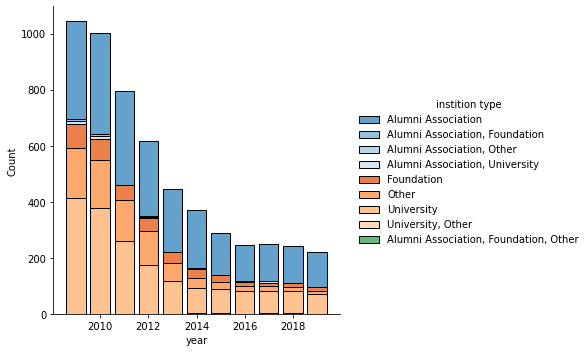

In [22]:
# stacked bar plot instition types by years
ax = sns.displot(q1df, x='year', discrete=True, hue='instition type', weights='counts', bins=11,
             multiple='stack', palette='tab20c', shrink=0.8)
# set legend outside of plot region
ax.legend.set_bbox_to_anchor((1, 0.5))

#### QUESTION 1 Comments: 
from the chart one can see that the total number of Institution_CCIssuer rows for each year decreases. The composition of each year's types of institutions remains approximately the save; however, the "Alumni Association, Foundation, Other" type begins to be used in 2014.

### <b>Question 2</b>: How do the total number of <b>new</b> accounts change over time? In other words, by year how many total new accounts are opened for all issuers at all institutions?

In [23]:
# TO DO: SQL QUERY FOR QUESTION 2
# DIANA COMMENTS: I think you want to use SUM() instead of COUNT()
#c.execute('''SELECT year,  count(total_new_acc) AS counts
c.execute('''SELECT year,  SUM(total_new_acc) AS counts
From Institution_CCIssuer
GROUP BY year''')
query = c.fetchall()
#query
q2df = pd.DataFrame(query,columns=['year', 'new accounts'])
q2df

,year,new accounts
0,2009,55747
1,2010,46381
2,2011,43227
3,2012,44924
4,2013,53699
5,2014,62540
6,2015,53565
7,2016,57984
8,2017,67071
9,2018,55323


#### <b>Chart 2</b>: Total new accounts by year.

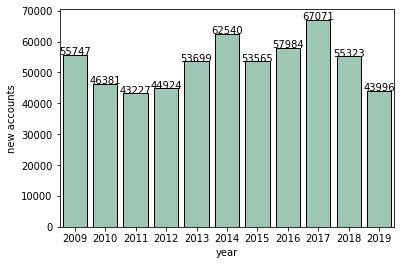

In [24]:
ax = ax = sns.barplot(x="year", y="new accounts", data=q2df, color="#96ceb4", edgecolor=(0,0,0))

val_labels = q2df['new accounts']

# label each bar in barplot
for p, val in zip(ax.patches, val_labels):
  # get the height of each bar
  height = p.get_height()
  # adding text to each bar
  ax.text(x = p.get_x()+(p.get_width()/2),y = height +5,s = val, ha = 'center', color ='black') 
plt.show()

### <b>Question 3</b>: How do the total number of <b>total</b> accounts change over time. In other words, by year how many total "total" accounts are open for all issuers at all institutions?

In [25]:
# Group by year then pull the year and the sum of total open accoutns for the year.
c.execute('''
SELECT SUM(total_open_acc), year
FROM Institution_CCIssuer
GROUP BY year;
''')
query = c.fetchall()

# save and print the results
q3df = pd.DataFrame(query,columns=['Number of Accounts','Year'])
q3df

,Number of Accounts,Year
0,2041511,2009
1,1709050,2010
2,1501081,2011
3,1209608,2012
4,948158,2013
5,853725,2014
6,833584,2015
7,752716,2016
8,744366,2017
9,715290,2018


#### <b>Chart 3</b>: Total "total" accounts by year.




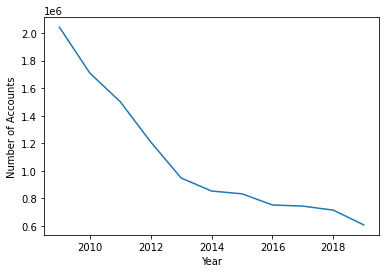

In [26]:
# Line chart showing number of accounts in millions vs year.
sns.lineplot(data=q3df, x='Year', y='Number of Accounts')

#### QUESTION 3 Comments:
It looks like this trend is actually decreasing, which is consistent with the chart from QUESTION 1. We wonder if it could be decreasing from a peak before the financial crisis.

### <b>Question 4</b>: We wonder if the total number of credit card issuers increased between 2009 and 2019. Another way to ask this, do the number of credit card issuers change over time?

In [27]:
# Group by year, return the year and a count of distinct credit card issuers
c.execute('''
SELECT COUNT(DISTINCT CC_iss_name), Year
FROM Institution_CCIssuer
GROUP BY year;
''')
query = c.fetchall()

# save and print the results
q4df = pd.DataFrame(query,columns=['Number of Issuers','Year'])
q4df

,Number of Issuers,Year
0,18,2009
1,21,2010
2,20,2011
3,22,2012
4,25,2013
5,33,2014
6,34,2015
7,39,2016
8,41,2017
9,39,2018


#### <b>Chart 4</b>: Total credit card issuers by year

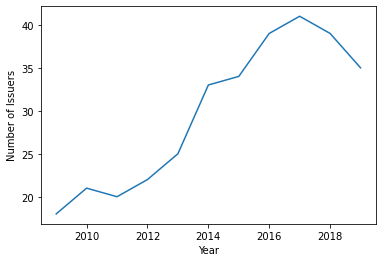

In [28]:
# Number of Issuers vs Year
sns.lineplot(data=q4df, x='Year', y='Number of Issuers')

#### QUESTION 4 Comments:
It looks like the number of issuers targeting college kids went up (while total applications decreased as shown in question 3), peaking in 2017. This may contradict our theory in question 3 that credit card issuers were withdrawing from the market. Perhapse this is evidence that there was strong demand for credit card applicants on behalf of the issuers, while CFPB disclosure requirements and general education decreased actual accounts.

### <b>Question 5</b>: Average Top 5 state account sums.

In [36]:
# SQL QUERY QUESTION 5
c.execute('''SELECT
UPPER(state_abbv),
CAST (AVG(total_open_acc) AS INT)
FROM Institution_CCIssuer
GROUP BY (state_abbv)
ORDER BY AVG(total_open_acc) DESC
LIMIT 5''')
query = c.fetchall()
#query
q5df = pd.DataFrame(query,columns=['State','Average Total Accounts Between 2009-2019'])
q5df

,State,Average Total Accounts Between 2009-2019
0,MA,11583
1,WA,4569
2,MS,4488
3,AZ,4252
4,IA,4198


### <b>Chart 5</b>: Average Top 5 state account sums.

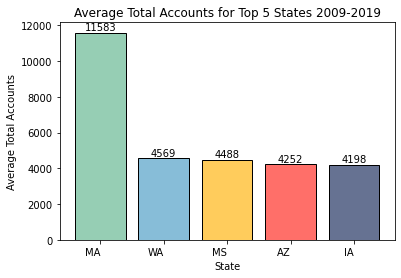

In [38]:
# CHART FOR QUESTION 5

# set the colors for the 5 states
colors = ['#96ceb4', '#87bdd8', '#ffcc5c', '#ff6f69', '#667292']
fig, ax = plt.subplots()
ax.bar(q5df['State'], q5df['Average Total Accounts Between 2009-2019'],
    color = colors, edgecolor = 'black')

labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment = 'right')

ax.set_title('Average Total Accounts for Top 5 States 2009-2019')  # Note title moves to make room for ticks
ax.set_xlabel("State")
ax.set_ylabel("Average Total Accounts")

# get the bars
rects = ax.patches

# set the labels
val_labels = q5df['Average Total Accounts Between 2009-2019']

# enumerate over the rectangles and their labels and add the label to the top of the bar
for rect, label in zip(rects, val_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#### QUESTION 5 Comments:
MA has significantly more Average Total Accounts between 2009 and 2019. Is this because credit card issuers are more likely to market to, and approve credit card applications to MA college students and alums?

### <b>Question 6</b>:  In how many states in 2010 does 'Chase Bank' have an institution with greater than or equal to 500 total open accounts?

In [39]:
#'institution_name','inst_type_name','active_ind','display_order', 'state_abbv', 'institution_city'

# SQL QUERY QUESTION 6
c.execute('''SELECT
COUNT(DISTINCT state_abbv)
FROM Institution_CCIssuer
WHERE year = 2010 AND CC_iss_name = 'Chase Bank' AND total_open_acc >=500
''')
query = c.fetchall()
#query
#q6df = pd.DataFrame(query,columns=['Number of States',])
q6df = pd.DataFrame(query,columns=['Count of states in 2010 where Chase Base had over 500 total open accounts at an institution.'])
q6df

,Count of states in 2010 where Chase Base had over 500 total open accounts at an institution.
0,13


#### QUESTION 6 Comments:
In 2010. there were <b>13 states</b> Chase Bank had at least 500 total open accounts.

### <b>Question 7</b>: Which states are the states where in 2010 Chase Bank had over 500 open accounts?

In [40]:
#'institution_name','inst_type_name','active_ind','display_order', 'state_abbv', 'institution_city'

# SQL QUERY QUESTION 7
c.execute('''SELECT
DISTINCT state_abbv
FROM Institution_CCIssuer
WHERE year = 2010 AND CC_iss_name = 'Chase Bank' AND total_open_acc >=500
ORDER BY state_abbv
''')
query = c.fetchall()
#query
q7df = pd.DataFrame(query,columns=['State where in 2010 Chase Base had over 500 total open accounts at an institution.'])
q7df

,State where in 2010 Chase Base had over 500 total open accounts at an institution.
0,CT
1,FL
2,IL
3,IN
4,KY
5,MD
6,NC
7,NY
8,OK
9,OR


#### QUESTION 7 Comments:
The 13 states where in 2010 Chase Bank had at least 500 total open accounts were, in alpha order:

1. CT
1. FL
1. IL
1. IN
1. KY
1. MD
1. NC
1. NY
1. OK
1. OR
1. TN
1. TX
1. VA



### <b>Question 8</b>: What is the average number of open accounts in states where Chase Bank had over 500 open accounts at at east one institution in 2010?

In [42]:
#'institution_name','inst_type_name','active_ind','display_order', 'state_abbv', 'institution_city'

# SQL QUERY QUESTION 8
c.execute('''SELECT
state_abbv,
AVG(total_open_acc)
FROM Institution_CCIssuer
WHERE year = 2010 AND CC_iss_name = 'Chase Bank'
GROUP BY state_abbv
HAVING total_open_acc >=500
ORDER BY state_abbv
''')
query = c.fetchall()
#query
q8df = pd.DataFrame(query)
q8df

,0,1
0,CT,9206.0
1,FL,11592.0
2,KY,7806.0
3,MD,8068.5
4,NC,7682.0
5,OK,6952.0
6,OR,3797.5
7,TN,4351.0
8,TX,2438.0
9,VA,11748.0


### <b>Question 9</b>: In Virginia, per year what are the average accounts per city?


In [34]:
#'institution_name','inst_type_name','active_ind','display_order', 'state_abbv', 'institution_city'
# display all rows
pd.set_option('display.max_rows', None)

# SQL QUERY QUESTION 9
c.execute('''SELECT
year,
institution_city,
AVG(total_open_acc)
FROM Institution_CCIssuer
WHERE state_abbv = 'VA'
GROUP BY institution_city, year
ORDER BY year, AVG(total_open_acc) DESC
''')
query = c.fetchall()
#query
q9df = pd.DataFrame(query)
q9df

,0,1,2
0,2009,Blacksburg,13624.000000
1,2009,Williamsburg,5644.000000
2,2009,Reston,2472.500000
3,2009,Charlottesville,1894.000000
4,2009,Fairfax,1846.000000
5,2009,Norfolk,1042.000000
6,2009,Lynchburg,1029.500000
7,2009,Alexandria,932.166667
8,2009,Richmond,873.750000
9,2009,Arlington,844.666667


In [35]:
# housekeeping
#conn.commit()
#c.close()
#conn.close()